In [1]:
using PyPlot, LinearAlgebra, JLD2

include("compute_OT.jl")
include("code/Mixed_Wasserstein.jl")
include("code/Sinkhorn.jl")
include("code/sinkhorn_uot.jl")

matplotlib.rcParams["text.usetex"] = true

true

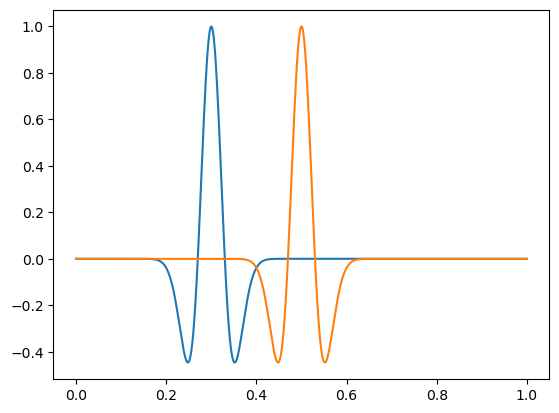

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5736623d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5736624c0>

In [2]:
Nt = 1001
t = range(0, step=1e-3, length=Nt)

function normal_plus(f,k)
    return f .+ k
    end

function normal_exp(f,k)
    return exp.(k.*f)
end

function normal_sq(f)
    return f.^2
end

a = ricker_func(t, 0.3, 0.03)
b = ricker_func(t, 0.5, 0.03)

M = cost_matrix_1d(t,t)

plot(t,a,t,b)

In [3]:
esp = 1e-3
reg_m = 1e0
lambda_mix = 1e-10
iterMax = 500

500

## Shift UOT and Mixed

In [4]:
println(minimum(a))
shift_time = range(0.25, step=5e-3, stop=0.75)
n = length(shift_time)

dist_l2 = zeros(length(shift_time))
for i = 1:n
    a = ricker_func(t, shift_time[i], 0.03)
    dist_l2[i] = norm(a-b,2)
end


-0.44625922005057694


In [5]:
b = ricker_func(t, 0.5, 0.03)

k1 = 0.45
k2 = 0.65
k3 = 1

b_plus1 = normal_plus(b,k1)
b_plus2 = normal_plus(b,k2)
b_plus3 = normal_plus(b,k3)

dist_uot_plus1 = zeros(n)
dist_uot_plus2 = zeros(n)
dist_uot_plus3 = zeros(n)

dist_mixed_plus1 = zeros(n)
dist_mixed_plus2 = zeros(n)
dist_mixed_plus3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, shift_time[i], 0.03)
    
    a_plus1 = normal_plus(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_plus1, b_plus1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_plus1, b_plus1, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus1[i] = dist1
    
    a_plus2 = normal_plus(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_plus2, b_plus2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_plus2, b_plus2, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus2[i] = dist2
    
    a_plus3 = normal_plus(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_plus3, b_plus3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_plus3, b_plus3, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/shift_ricker_plus.jld2" shift_time dist_l2 dist_uot_plus1 dist_uot_plus2 dist_uot_plus3 dist_mixed_plus1 dist_mixed_plus2 dist_mixed_plus3 k1 k2 k3


0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
130.817302 seconds (10.96 M allocations: 44.468 GiB, 4.17% gc time)


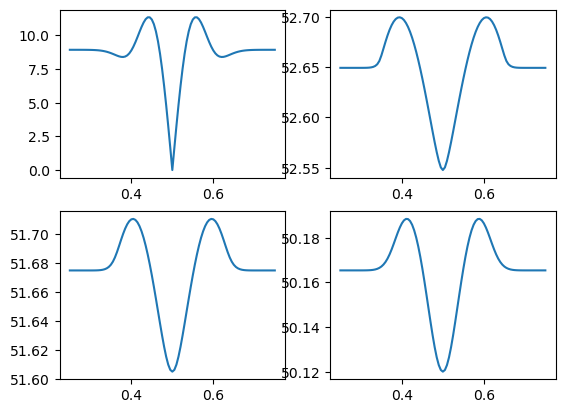

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd55ce75c70>

In [6]:
subplot(221)
plot(shift_time,dist_l2)
subplot(222)
plot(shift_time,dist_uot_plus1)
subplot(223)
plot(shift_time,dist_uot_plus2)
subplot(224)
plot(shift_time,dist_uot_plus3)

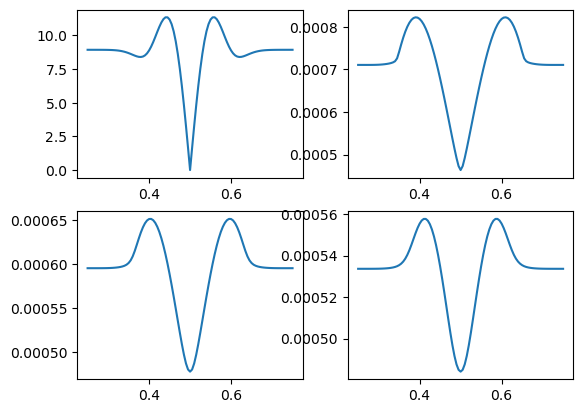

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd55d981e50>

In [7]:
subplot(221)
plot(shift_time,dist_l2)
subplot(222)
plot(shift_time,dist_mixed_plus1)
subplot(223)
plot(shift_time,dist_mixed_plus2)
subplot(224)
plot(shift_time,dist_mixed_plus3)

In [8]:
shift_time = range(0.25, step=5e-3, stop=0.75)
n = length(shift_time)
b = ricker_func(t, 0.5, 0.03)

k1 = 0.5
k2 = 1
k3 = 1.5

b_exp1 = normal_exp(b,k1)
b_exp2 = normal_exp(b,k2)
b_exp3 = normal_exp(b,k3)

dist_uot_exp1 = zeros(n)
dist_uot_exp2 = zeros(n)
dist_uot_exp3 = zeros(n)

dist_mixed_exp1 = zeros(n)
dist_mixed_exp2 = zeros(n)
dist_mixed_exp3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, shift_time[i], 0.03)
    
    a_exp1 = normal_exp(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_exp1, b_exp1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_exp1, b_exp1, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp1[i] = dist1
    
    a_exp2 = normal_exp(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_exp2, b_exp2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_exp2, b_exp2, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp2[i] = dist2
    
    a_exp3 = normal_exp(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_exp3, b_exp3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_exp3, b_exp3, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/shift_ricker_exp.jld2" shift_time dist_l2 dist_uot_exp1 dist_uot_exp2 dist_uot_exp3 dist_mixed_exp1 dist_mixed_exp2 dist_mixed_exp3 k1 k2 k3




0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
126.155018 seconds (2.02 M allocations: 44.060 GiB, 4.18% gc time)


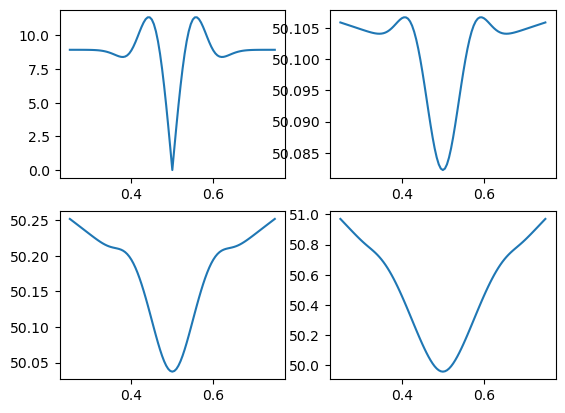

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd55db16850>

In [9]:
subplot(221)
plot(shift_time,dist_l2)
subplot(222)
plot(shift_time,dist_uot_exp1)
subplot(223)
plot(shift_time,dist_uot_exp2)
subplot(224)
plot(shift_time,dist_uot_exp3)

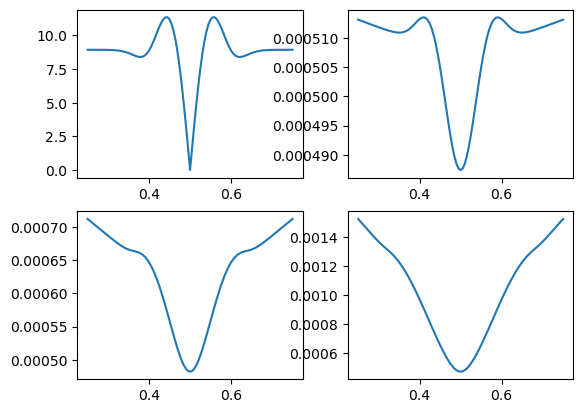

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd55e4e4af0>

In [10]:
subplot(221)
plot(shift_time,dist_l2)
subplot(222)
plot(shift_time,dist_mixed_exp1)
subplot(223)
plot(shift_time,dist_mixed_exp2)
subplot(224)
plot(shift_time,dist_mixed_exp3)

## Dilation UOT and Mixed

In [11]:
esp = 1e-3
reg_m = 1e0
lambda_mix = 1e-8
iterMax = 500

500

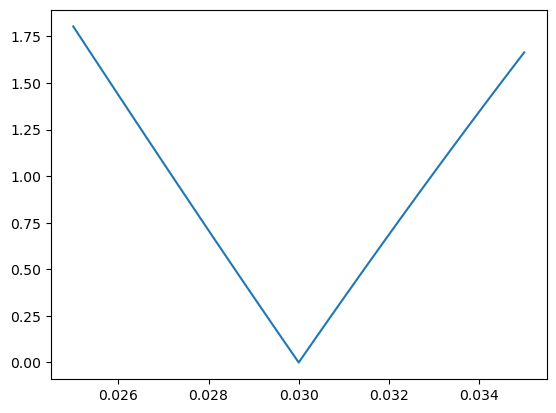

101


In [12]:
shift_sigma = range(0.025, step=1e-4, stop=0.035)
n = length(shift_sigma)

b = ricker_func(t, 0.5, 0.03)
dist_dilation_l2 = zeros(length(shift_sigma))
for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    dist_dilation_l2[i] = norm(a-b,2)
end

plot(shift_sigma, dist_dilation_l2)
println(n)

In [24]:
esp = 1e-3
reg_m = 1e0
lambda_mix = 1e-5
iterMax = 500

500

In [18]:
# linear plus
b = ricker_func(t, 0.5, 0.03)

k1 = 0.45
k2 = 1
k3 = 5

b_plus1 = normal_plus(b,k1)
b_plus2 = normal_plus(b,k2)
b_plus3 = normal_plus(b,k3)

dist_uot_plus1 = zeros(n)
dist_uot_plus2 = zeros(n)
dist_uot_plus3 = zeros(n)

dist_mixed_plus1 = zeros(n)
dist_mixed_plus2 = zeros(n)
dist_mixed_plus3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    
    a_plus1 = normal_plus(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_plus1, b_plus1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_plus1, b_plus1, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus1[i] = dist1
    
    a_plus2 = normal_plus(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_plus2, b_plus2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_plus2, b_plus2, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus2[i] = dist2
    
    a_plus3 = normal_plus(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_plus3, b_plus3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_plus3, b_plus3, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/dilation_add.jld2" shift_sigma dist_dilation_l2 dist_uot_plus1 dist_uot_plus2 dist_uot_plus3 dist_mixed_plus1 dist_mixed_plus2 dist_mixed_plus3 k1 k2 k3

0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
140.919343 seconds (2.01 M allocations: 44.059 GiB, 3.83% gc time)


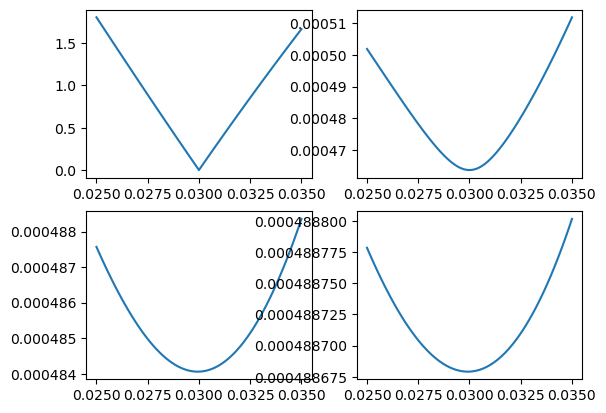

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd55fc3dee0>

In [19]:
subplot(221)
plot(shift_sigma,dist_dilation_l2)
subplot(222)
plot(shift_sigma,dist_mixed_plus1)
subplot(223)
plot(shift_sigma,dist_mixed_plus2)
subplot(224)
plot(shift_sigma,dist_mixed_plus3)

In [25]:
b = ricker_func(t, 0.5, 0.03)

k1 = 0.1
k2 = 1
k3 = 10

b_exp1 = normal_exp(b,k1)
b_exp2 = normal_exp(b,k2)
b_exp3 = normal_exp(b,k3)

dist_uot_exp1 = zeros(n)
dist_uot_exp2 = zeros(n)
dist_uot_exp3 = zeros(n)

dist_mixed_exp1 = zeros(n)
dist_mixed_exp2 = zeros(n)
dist_mixed_exp3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    
    a_exp1 = normal_exp(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_exp1, b_exp1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_exp1, b_exp1, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp1[i] = dist1
    
    a_exp2 = normal_exp(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_exp2, b_exp2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_exp2, b_exp2, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp2[i] = dist2
    
    a_exp3 = normal_exp(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_exp3, b_exp3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_exp3, b_exp3, esp, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/dilation_exp.jld2" shift_sigma dist_dilation_l2 dist_uot_exp1 dist_uot_exp2 dist_uot_exp3 dist_mixed_exp1 dist_mixed_exp2 dist_mixed_exp3 k1 k2 k3

0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
119.986964 seconds (2.01 M allocations: 44.060 GiB, 4.01% gc time)


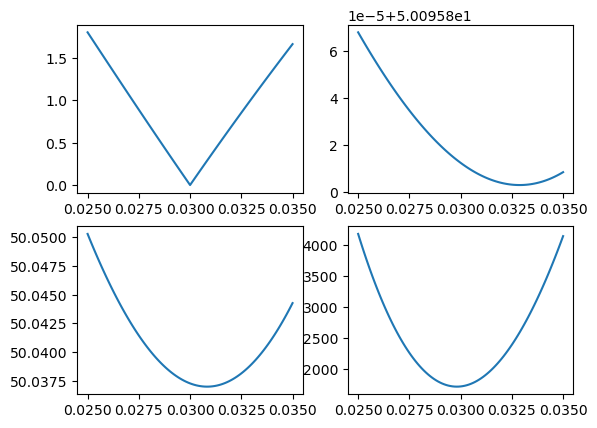

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5613294f0>

In [26]:
subplot(221)
plot(shift_sigma,dist_dilation_l2)
subplot(222)
plot(shift_sigma,dist_uot_exp1)
subplot(223)
plot(shift_sigma,dist_uot_exp2)
subplot(224)
plot(shift_sigma,dist_uot_exp3)

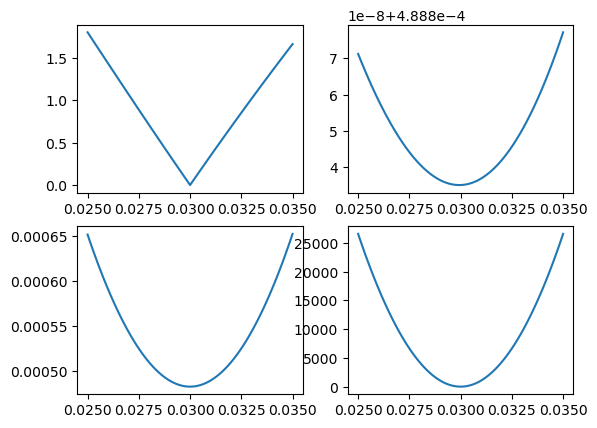

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd561479bb0>

In [27]:
subplot(221)
plot(shift_sigma,dist_dilation_l2)
subplot(222)
plot(shift_sigma,dist_mixed_exp1)
subplot(223)
plot(shift_sigma,dist_mixed_exp2)
subplot(224)
plot(shift_sigma,dist_mixed_exp3)